# Phase angle photometry fit

In [3]:
import numpy as np
import matplotlib.pyplot as plt

from ssi.geol import EUROPA

### Functions definitions

In [4]:
def get_data(imgs, param, unit):
    """Get phase and values for a parameter and unit on a list of images.
    
    Parameters
    ----------
   imgs: list
        List of images.
    param: str
        Photometric parameter name.
    unit: str
        Unit name.

    Returns
    -------
    list:
        List of image phase angles (deg).
    list:
        Photometric values for the selected unit.

    """
    
    col = ['unit', 'B0', 'dB0', 'k', 'dk', 'A', 'dA', 'f_alpha', 'df_alpha'].index(param)
    
    values = []
    phases = []
        
    for img in imgs:
        fname = f'{img}.pho.csv'
        
        # Get value
        units = np.loadtxt(fname, usecols=0, delimiter=',', dtype=str)
        vals = np.loadtxt(fname, usecols=col, delimiter=',')
        
        for u, v in zip(units, vals):
            if unit == u and not np.isnan(v):
                value = v
                break
        else:
            print(f'WARNING: Unit `{u}` not found in {img} - Skipping this image.')
            continue
                
        # Get phase value
        with open(fname) as f:
            lines = f.readlines()

        for line in lines:
            if '#' in line and 'phase' in line:
                phase = float(line.split(',')[1])
                break
        else:
            raise ValueError('Phase angle not found.')

        # Collect the value and the phase
        values.append(value)
        phases.append(phase)
            
    return phases, values


# def phase_fit(phases, values):
#     """Linear fit as function of the phase angle.
    
#     values = a * phases + b
    
#     Parameters
#     ----------
#     phases: list
#         List of phase angles.
#     values: list
#         Photometric parameter values.
    
#     Returns
#     -------
#     list:
#         Fit x-values.
#     list:
#         Fit y-values.
        
#     """
    
#     xmin, xmax = np.min(phases), np.max(phases)
    
#     a, b = np.polyfit(phases, values, 1)
    
#     return [xmin, xmax], [a * xmin + b, a * xmax + b]

In [5]:
# def phase_fit(phases, values, npoly=1):
#     """Linear fit as function of the phase angle.
#     values = a * phases + b
#     Parameters
#     ----------
#     phases: list
#         List of phase angles.
#     values: list
#         Photometric parameter values.
#     npoly: int
#         Polynomial degree of the fit (default 1).
#     Returns
#     -------
#     list:
#         Fit x-values.
#     list:
#         Fit y-values.
#     """
#     xmin, xmax = np.min(phases), np.max(phases)
#     a, b = np.polyfit(phases, values, npoly)
#     return [xmin, xmax], [a * xmin + b, a * xmax + b]

In [6]:
def phase_fit(phases, values, npoly=1, coeff=False):
    """Linear fit as function of the phase angle.
    values = a * phases + b
    Parameters
    ----------
    phases: list
        List of phase angles.
    values: list
        Photometric parameter values.
    npoly: int, optional
        Polynomial degree of the fit (default 1).
    coeff: bool, optional
        Return fitted data to be plotted if `FALSE` (default).
        Return polynomial coefficient if `TRUE`
    Returns
    -------
    list, list:
        Fitted x and y-values (if `coeff=False`, default).
    list:
        Fitted polynomial coefficients (if `coeff=True`).
    """
    xmin, xmax = np.min(phases), np.max(phases)
    p = np.polyfit(phases, values, npoly)
    z = np.poly1d(p)
    return ([xmin, xmax], [z(xmin), z(xmax)]) if not coeff else p

### Inputs and fit

In [66]:
imgs = [
#    'C0413743222R',
#    'C0413743200R',
   # 'C2059319',  #Violet
   # 'C2065145',   #Violet
   # 'C0401727726R_cal', #Violet
   # 'C0413743200R_cal', #Violet
   # 'C0639063413R_cal', #Violet
   # 'C0360063913R_cal',  # Violet
       'C2060513',                 #phase 10
       'C2065213',                 #phase 107
       'C2065221',                 #phase 108
       #'lor_0034735439_0x630_sci', #phase 20  #remove for crater
       'lor_0034866662_0x630_sci', #phase 35 on 01/27
       #'lor_0034823099_0x630_sci', #phase 22   #removed for chaos n crater
        'lor_0034930319_0x630_sci', #phase 69  on 01/27
        'lor_0034931999_0x630_sci', #phase 71
        'lor_0034975919_0x630_sci',  #phase 100 Odd values can be removed
        'lor_0035025959_0x630_sci',  #phase 128   #removed for chaos
        #'5126r_cal',                 #phase 38
        'C0374649026R',              #phase  75
        'C0349875100R',             #phase  83
        'C0368639400R',             #phase 65
        'C0349875113R',             #phase 37
        'C0374649000R',             #phase 56
#    'C0374649013R',             #phase   56     #remove for crater  
        'C0374649026R',              #phase 55
        'C0383694600R',             #phase 37 rem chaos
#    'C0383717539R',
        'C2065022',                 #phase 94
        'C2065016',                 #phase 107
        'C2065219',                 #phase 108
 
]


param = 'B0' #'B0'
# unit = 'Ridged plains'
# color = EUROPA.color(unit)

# param = 'B0'
# # param = 'k'
# # unit = 'Ridged plains'
# # unit = 'Bands'
# unit = 'Low albedo chaos'#, 'Mottled albedo chaos']
#unit = 'Mottled albedo chaos'
# unit = 'High albedo chaos'
# unit = 'Crater' #not working, giving error
# unit = 'Continuous crater ejecta'




In [67]:
units = [
 #     'Low albedo chaos',
#      'Mottled albedo chaos',
 #     'High albedo chaos',
#      'Knobby albedo chaos',
     'Ridged plains',
     'Bands',
#    'Crater',
#    'Continuous crater ejecta',
#     'Discontinuous crater ejecta'
 ]
phases = []
values = []
errors = []
colors = []
for unit in units:
    p, v = get_data(imgs, param, unit)
    _, e = get_data(imgs, 'd' + param, unit)
    c = EUROPA.color(unit)
    phases += p
    values += v
    errors += e
    colors += len(p) * [c]

In [68]:
len(phases), len(values), len(errors), len(colors)

(31, 31, 31, 31)

In [69]:
#param
EUROPA.color(unit)

(0.5176470588235295, 0.0, 0.6588235294117647, 1.0)

In [70]:
phases

[10.0,
 107.0,
 108.0,
 35.0,
 69.0,
 71.0,
 100.0,
 128.0,
 37.0,
 65.0,
 37.0,
 56.0,
 37.0,
 94.0,
 93.0,
 108.0,
 10.0,
 107.0,
 108.0,
 35.0,
 69.0,
 71.0,
 100.0,
 128.0,
 37.0,
 65.0,
 37.0,
 37.0,
 94.0,
 93.0,
 108.0]

In [71]:
# errors
#units
values

[0.6855,
 0.376,
 0.3577,
 0.533,
 0.6321,
 0.6631,
 0.6436,
 0.6489,
 0.7088,
 0.5737,
 0.6923,
 0.5207,
 0.7252,
 0.3846,
 0.4598,
 0.4188,
 0.7036,
 0.357,
 0.4408,
 0.5163,
 0.57,
 0.6008,
 0.6749,
 0.4039,
 0.6488,
 0.5245,
 0.6304,
 0.7715,
 0.3443,
 0.4307,
 0.4315]

In [72]:
#phase_fit(phases, values, coeff=True)
phase_fit(phases, values, coeff=False)
#phase_fit(phases, values, npoly=2, coeff=True)

([10.0, 128.0], [0.7072964139700332, 0.4126977090819769])

In [73]:
# phases, values = get_data(imgs, param, unit)
# _, err = get_data(imgs, 'dB0', unit)
# len(values)

In [74]:
# color = EUROPA.color(unit)
# phases, values = get_data(imgs, param, unit)
# phases, values

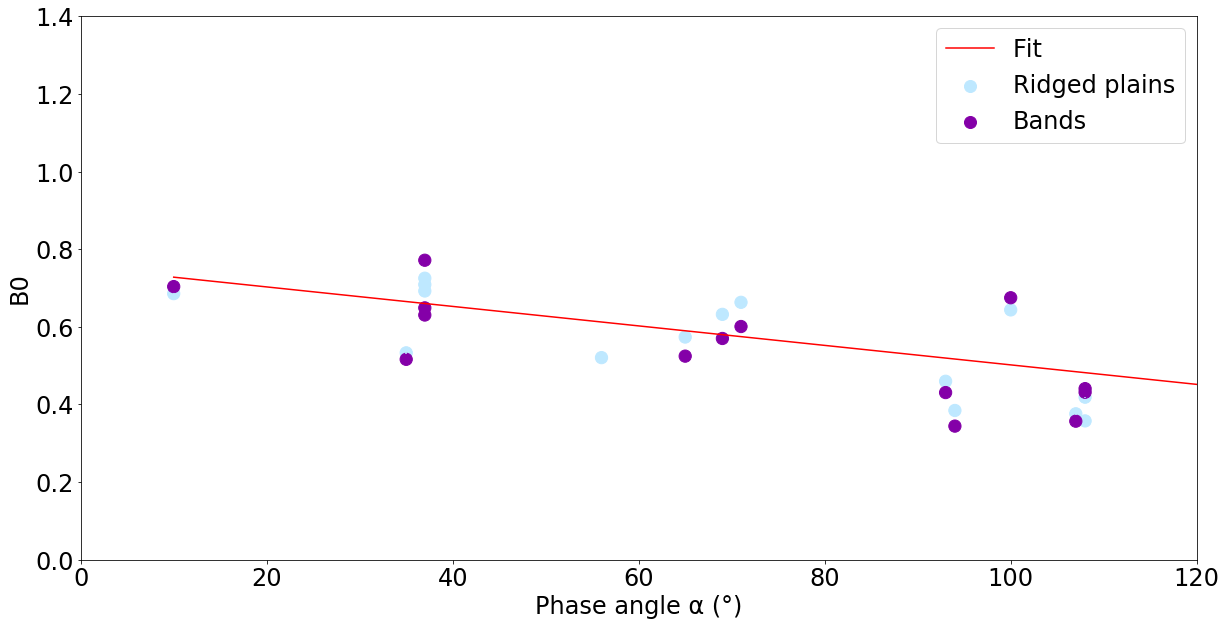

In [75]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.scatter(phases, values, color=colors, s= 150)#, label=unit)
#ax.errorbar(phases, values, yerr=errors, ecolors=colors, fmt='None')
ax.errorbar(phases, values, yerr=errors, ecolor=colors, fmt = 'None')
#ax.plot(*phase_fit(phases, values), color='red', label='Fit')
ax.set_xlabel('Phase angle α (°)', fontsize = 24)
#ax.set_ylabel('f(α)', fontsize = 24)
ax.set_ylabel(param, fontsize = 24)

#ax.plot(*phase_fit(phases, values), color='red', label='Fit')
ax.plot(*phase_fit(phases, values, npoly=2), color='red', label='Fit')



for unit in units:
    ax.scatter([], [], color=[EUROPA.color(unit)], label=unit)
ax.legend(markerscale = 2, fontsize = 24)



#ax.legend();
ax.set_ylim(0, 1.4)
ax.set_xlim(0, 120)
ax.tick_params(labelsize=24)
#plt.savefig(f'All_units-{param}-fitChaos.png', bbox_inches='tight', transparent=True);
#plt.savefig(f'B0_Bands.png', bbox_inches='tight', transparent=True);